Mean Squared Error: 13446.614872749695


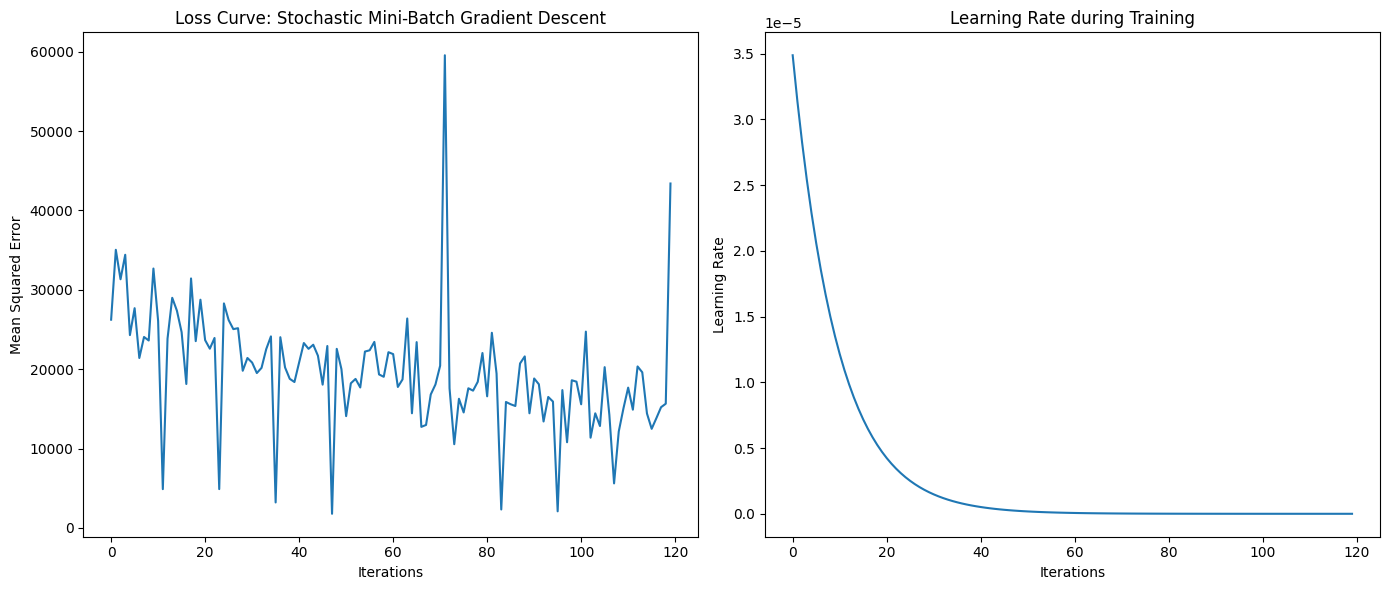

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X_scaled]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Initialize parameters
theta = np.random.randn(X_b.shape[1], 1)

# Hyperparameters
learning_rate = 0.0001  # learning rate
batch_size = 32
n_epochs = 10  # number of epochs

# List to store training history
loss_history = []

# Stochastic Mini-Batch Gradient Descent
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(len(X_train))
    X_shuffled = X_train[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]

    for batch_start in range(0, len(X_train), batch_size):
        batch_end = batch_start + batch_size
        X_batch = X_shuffled[batch_start:batch_end]
        y_batch = y_shuffled[batch_start:batch_end]

        gradient = -2 * X_batch.T.dot(y_batch - X_batch.dot(theta))
        theta -= learning_rate * gradient.mean(axis=1, keepdims=True)  # Update the parameters

        loss = np.mean((X_batch.dot(theta) - y_batch) ** 2)
        loss_history.append(loss)

    # Reduce the learning rate for the next epoch
    learning_rate *= 0.9

# Calculate predictions
y_pred = X_test.dot(theta)

# Calculate mean squared error
mse = np.mean((y_test - y_pred) ** 2)

print("Mean Squared Error:", mse)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss history
ax1.plot(loss_history)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Loss Curve: Stochastic Mini-Batch Gradient Descent')

# Plot learning rate history
learning_rate_history = [learning_rate * (0.9 ** i) for i in range(len(loss_history))]
ax2.plot(learning_rate_history)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate during Training')

# Display the plots
plt.tight_layout()
plt.show()
